# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url)
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


### Step 4. Which continent drinks more beer on average?

In [3]:
drinks.groupby('continent')\
      .agg({'beer_servings':'sum'})\
      .sort_values(by='beer_servings', ascending=False).iloc[0:1]

,beer_servings
continent,
EU,8720


### Step 5. For each continent print the statistics for wine consumption.

In [4]:
calc = lambda x: round(x*100/x.sum(),1) #x['wine_servings']/
cont_pct_drinks = drinks.groupby('continent')['beer_servings', 'spirit_servings', 'wine_servings'].sum()\
      .agg(calc, axis=1)
cont_pct_drinks

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,65.3,17.4,17.3
AS,34.6,56.9,8.5
EU,41.4,28.3,30.4
OC,48.8,31.8,19.4
SA,49.7,32.6,17.7


<Figure size 432x288 with 0 Axes>

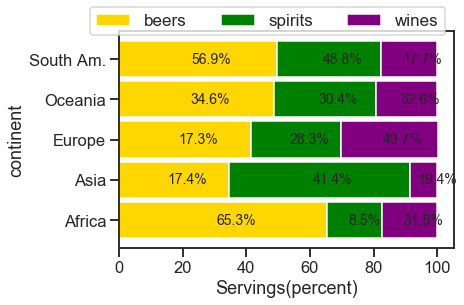

In [5]:
sns.set('talk', 'ticks')
fig,ax = plt.subplots(1)
fig.patch.set_facecolor('white') # fig.patch.set_alpha(1)
_ = cont_pct_drinks.reset_index()
colors = ['gold', 'green', 'purple']
dict_cont={'SA': 'South Am.',  'OC': 'Oceania', 'EU': 'Europe', 
           'AS': 'Asia', 'AF': 'Africa'}
_.plot.barh(x='continent', y=_.columns[1:], width=0.9,color=colors, stacked=True,rot=0, ax=ax)
ax.set_xlabel("Servings(percent)")
vals = _.iloc[:,1:].values.reshape(-1)
for i, (p, v) in enumerate(zip(ax.patches, vals)):
    ax.text(p.get_width()/2 + p.get_x()-2, p.get_y()+0.35, str(v)+'%', fontsize=14)
ax.set_yticklabels(_['continent'].map(dict_cont))
sns.despine()
plt.legend(['beers', 'spirits', 'wines'], bbox_to_anchor=(1,1.15), fontsize=17, ncol=3)
plt.show()

### Step 6. Print the mean alcohol consumption per continent for every column

In [6]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
drinks.rename(columns={'country': 'cnt', 'beer_servings': 'beer',
                       'spirit_servings': 'spirit', 'wine_servings': 'wine',
                       'total_litres_of_pure_alcohol': 'tot_alc', 'continent': 'cont' },
             inplace=True)
drinks.head(2)

,cnt,beer,spirit,wine,tot_alc,cont
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


### Step 7. Print the median alcohol consumption per continent for every column

In [156]:
agg_df = drinks.groupby('cont').agg([np.median, min, max])
agg_df.columns = ['__'.join(c).strip() for c in agg_df.columns.values]
agg_df.head()

,beer__median,beer__min,beer__max,spirit__median,spirit__min,spirit__max,wine__median,wine__min,wine__max,tot_alc__median,tot_alc__min,tot_alc__max
cont,,,,,,,,,,,,
AF,32.0,0,376,3.0,0,152,2.0,0,233,2.30,0.0,9.1
AS,17.5,0,247,16.0,0,326,1.0,0,123,1.20,0.0,11.5
EU,219.0,0,361,122.0,0,373,128.0,0,370,10.00,0.0,14.4
OC,52.5,0,306,37.0,0,254,8.5,0,212,1.75,0.0,10.4
SA,162.5,93,333,108.5,25,302,12.0,1,221,6.85,3.8,8.3


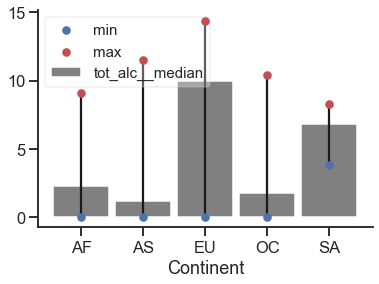

In [157]:
fig, ax = plt.subplots(1)
ax.scatter(x=np.arange(5), y=agg_df.reset_index()['tot_alc__min'], s=50, c='b', label='min', zorder=10)
ax.scatter(x=np.arange(5), y=agg_df.reset_index()['tot_alc__max'], s=50, c='r', label='max', zorder=10)
ax.vlines(x=np.arange(5),
          ymin=agg_df.reset_index()['tot_alc__min'],
          ymax=agg_df.reset_index()['tot_alc__max'],
          color='k', zorder=5)
agg_df.reset_index().plot.bar(x='cont', y='tot_alc__median', width=0.9, ax=ax, rot=0,color='grey', zorder=2)
ax.legend(frameon=1, loc='upper left', prop={'size': 15}).get_frame().set_alpha(0.3)
ax.axis(option='square')
ax.set_xlabel('Continent')
sns.despine()

In [175]:
# Which country in Europe drink no alcohol ?
drinks[(drinks['tot_alc']==0) & (drinks['cont']=='EU')]

,cnt,beer,spirit,wine,tot_alc,cont
111,Monaco,0,0,0,0.0,EU
147,San Marino,0,0,0,0.0,EU


In [181]:
# Which country in each continent Europe drink less alcohol (but not zero) ?
drinks[drinks['tot_alc']!=0].groupby('cont').min()

,cnt,beer,spirit,wine,tot_alc
cont,,,,,
AF,Algeria,1,0,0,0.1
AS,Bahrain,0,0,0,0.1
EU,Albania,21,27,5,1.3
OC,Australia,0,0,1,0.9
SA,Argentina,93,25,1,3.8


In [182]:
# Which country in each continent Europe drink the more alcohol ?
drinks.groupby('cont').max()

,cnt,beer,spirit,wine,tot_alc
cont,,,,,
AF,Zimbabwe,376,152,233,9.1
AS,Yemen,247,326,123,11.5
EU,United Kingdom,361,373,370,14.4
OC,Vanuatu,306,254,212,10.4
SA,Venezuela,333,302,221,8.3


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [131]:
drinks['spirit'].agg([min, max, np.mean])

min       0.000000
max     438.000000
mean     80.994819
Name: spirit, dtype: float64

In [152]:
# Countries that have minimum value for spirit_servings
for n in drinks.loc[drinks['spirit']==drinks['spirit'].min()]['cnt'].to_list():
    print(n,end=' | ')

Afghanistan | Algeria | Bangladesh | Bhutan | Burundi | North Korea | Equatorial Guinea | Eritrea | Gambia | Guinea | Iran | Kuwait | Laos | Libya | Maldives | Marshall Islands | Mauritania | Monaco | Nauru | Pakistan | San Marino | Somalia | Yemen | 

In [153]:
# Country that have maximum value for spirit_servings
print(drinks.loc[drinks['spirit']==drinks['spirit'].max()]['cnt'])

68    Grenada
Name: cnt, dtype: object


In [129]:
# Mean value for spirit servings
drinks['spirit'].mean()

80.99481865284974

In [154]:
# List of countries drinking less spirit than mean value
for n in drinks.loc[drinks['spirit']<drinks['spirit'].mean()]['cnt'].to_list():
    print(n, end=' | ')

Afghanistan | Algeria | Angola | Argentina | Australia | Austria | Azerbaijan | Bahrain | Bangladesh | Benin | Bhutan | Bolivia | Botswana | Brunei | Burkina Faso | Burundi | Cote d'Ivoire | Cabo Verde | Cambodia | Cameroon | Central African Republic | Chad | Colombia | Comoros | Congo | North Korea | DR Congo | Djibouti | Ecuador | Egypt | El Salvador | Equatorial Guinea | Eritrea | Ethiopia | Fiji | Gambia | Ghana | Guatemala | Guinea | Guinea-Bissau | Iceland | Indonesia | Iran | Iraq | Israel | Italy | Jordan | Kenya | Kiribati | Kuwait | Laos | Lebanon | Lesotho | Libya | Madagascar | Malawi | Malaysia | Maldives | Mali | Marshall Islands | Mauritania | Mauritius | Mexico | Micronesia | Monaco | Morocco | Mozambique | Myanmar | Namibia | Nauru | Nepal | New Zealand | Niger | Nigeria | Norway | Oman | Pakistan | Palau | Papua New Guinea | Portugal | Qatar | South Korea | Rwanda | Samoa | San Marino | Sao Tome & Principe | Saudi Arabia | Senegal | Seychelles | Sierra Leone | Singapo

In [155]:
# List of countries drinking more spirit than mean value
for n in drinks.loc[drinks['spirit']>drinks['spirit'].mean()]['cnt'].to_list():
    print(n, end=' | ')

Albania | Andorra | Antigua & Barbuda | Armenia | Bahamas | Barbados | Belarus | Belgium | Belize | Bosnia-Herzegovina | Brazil | Bulgaria | Canada | Chile | China | Cook Islands | Costa Rica | Croatia | Cuba | Cyprus | Czech Republic | Denmark | Dominica | Dominican Republic | Estonia | Finland | France | Gabon | Georgia | Germany | Greece | Grenada | Guyana | Haiti | Honduras | Hungary | India | Ireland | Jamaica | Japan | Kazakhstan | Kyrgyzstan | Latvia | Liberia | Lithuania | Luxembourg | Malta | Mongolia | Montenegro | Netherlands | Nicaragua | Niue | Panama | Paraguay | Peru | Philippines | Poland | Moldova | Romania | Russian Federation | St. Kitts & Nevis | St. Lucia | St. Vincent & the Grenadines | Serbia | Slovakia | Spain | Sri Lanka | Suriname | Switzerland | Thailand | Trinidad & Tobago | Ukraine | United Arab Emirates | United Kingdom | USA | Uzbekistan | Venezuela | 